In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
%matplotlib inline

In [26]:
def resident(x, t):
    lamda = (beta1*(x[1]+x[2]))
    sdot = rho - mu*x[0] - sigmaS*lamda*x[0] + phi1*x[1] + phi11*x[2]
    i1dot = sigmaS*lamda*x[0] - (mu+alpha1+phi1+(sigmaI*lamda))*x[1]
    d11dot = sigmaI*lamda*x[1] - (mu+alpha1+phi11)*x[2]
    return sdot,i1dot,d11dot

In [27]:
mu = 0.02
rho = 0.02
sigmaS = 1
sigmaI = 5
phi1 = 0.4
phi11 = 0.2

beta1=0.75
alpha1 = 0.1 - 0.157**2/0.2*(1 - np.exp(0.2*(beta1 - 0.75)/0.157))

phim = 0.45
phi1m = 0.25

In [28]:
tmax2 = 2000
ts2 = np.linspace(0,200,tmax2)

In [29]:
x0 = [0.8,0.5,0.05]
xs = odeint(resident,x0,ts2)
Ss = xs[:,0]
I1s = xs[:,1]
D11s = xs[:,2]

S=Ss[1999]
I1=I1s[1999]
D11=D11s[1999]

In [30]:
def fitnessgrad():
    lambda1=(betam*(I1+D11))
    alpham = 0.1 - 0.157**2/0.2*(1 - np.exp(0.2*(betam - 0.75)/0.157))
    alphamd = 0.157*np.exp(0.2*(betam - 0.75)/0.157)
    dr = sigmaS*S*(((mu+alpham+phim+(sigmaI*lambda1)-(betam*alphamd))/((mu+alpham+phim+(sigmaI*lambda1))**2))+(((sigmaI*lambda1)/(mu+alpham+phim+(sigmaI*lambda1)))*(((mu+alpham+phi1m-(betam*alphamd))/((mu+alpham+phi1m)**2))-((((betam*alphamd)/(mu+alpham+phi1m)))/(mu+alpham+phim+(sigmaI*lambda1)))))) + sigmaI*I1*((1/(mu+alpham+phi1m))-((betam*alphamd)/((mu+alpham+phi1m)**2)))
    return dr 

In [31]:
ts = np.linspace(0,100,100)

# $\mu$

In [32]:
muvals = np.around(np.arange(start=0, stop=0.051, step=0.001),decimals=3)
betamvals = np.around(np.arange(start=0, stop=2.0001, step=0.0001),decimals=4)
singstratmu=[]

In [33]:
for i in muvals:
    mu = i 
    for j in betamvals:
        betam = j
        
        x0 = [0.8,0.5,0.05]
        xs = odeint(resident,x0,ts)
        Ss = xs[:,0]
        I1s = xs[:,1]
        D11s = xs[:,2]

        S=Ss[99]
        I1=I1s[99]
        D11=D11s[99]
        
        dr = fitnessgrad()
        
        if dr < 0:
            sings = (j + (j-0.0001))/2
            print("mu =",mu,"beta =",sings)
            singstratmu.append(sings)
            break

mu = 0.0 beta = 1.42095
mu = 0.001 beta = 1.4231500000000001
mu = 0.002 beta = 1.42545
mu = 0.003 beta = 1.42775
mu = 0.004 beta = 1.43005
mu = 0.005 beta = 1.4324500000000002
mu = 0.006 beta = 1.4349500000000002
mu = 0.007 beta = 1.43735
mu = 0.008 beta = 1.43995
mu = 0.009 beta = 1.44245
mu = 0.01 beta = 1.44495
mu = 0.011 beta = 1.4473500000000001
mu = 0.012 beta = 1.44965
mu = 0.013 beta = 1.4518499999999999
mu = 0.014 beta = 1.45385
mu = 0.015 beta = 1.4555500000000001
mu = 0.016 beta = 1.4570500000000002
mu = 0.017 beta = 1.45865
mu = 0.018 beta = 1.46055
mu = 0.019 beta = 1.46395
mu = 0.02 beta = 1.47085
mu = 0.021 beta = 1.4859499999999999
mu = 0.022 beta = 1.5155500000000002
mu = 0.023 beta = 1.55965
mu = 0.024 beta = 1.6047500000000001
mu = 0.025 beta = 1.6374499999999999
mu = 0.026 beta = 1.65645
mu = 0.027 beta = 1.66655
mu = 0.028 beta = 1.67185
mu = 0.029 beta = 1.6748500000000002
mu = 0.03 beta = 1.67665
mu = 0.031 beta = 1.6780499999999998
mu = 0.032 beta = 1.67915
mu =

(1.0, 2.0)

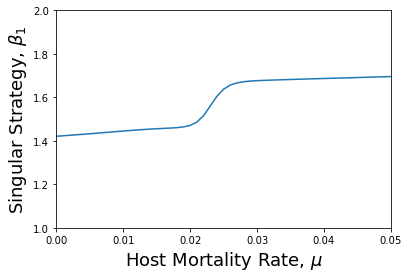

In [34]:
plt.plot(muvals,singstratmu)
plt.xlabel(r'Host Mortality Rate, $\mu$',fontsize=18)
plt.ylabel(r'Singular Strategy, $\beta_1$',fontsize=18)
plt.xlim(0,0.05) # in  maple first value of mu used is 0.005. limiting x-axis to this range
plt.ylim(1,2) 

# $\rho$

In [35]:
mu=0.02
rhovals = np.around(np.arange(start=0.00000000000000000000000000000000000000000000000001, stop=0.051, step=0.001),decimals=3)
betamvals = np.around(np.arange(start=0, stop=2.001, step=0.001),decimals=3)
singstratrho=[]

In [36]:
for i in rhovals:
    rho = i 
    for j in betamvals:
        betam = j 
             
        x0 = [0.8,0.5,0.05]
        xs = odeint(resident,x0,ts)
        Ss = xs[:,0]
        I1s = xs[:,1]
        D11s = xs[:,2]

        S=Ss[99]
        I1=I1s[99]
        D11=D11s[99]
        
        dr = fitnessgrad()
        
        if dr < 0:
            sings = (j + (j-0.001))/2
            print("rho =",rho,"beta =",sings)
            singstratrho.append(sings)
            break 

rho = 0.0 beta = 1.6685
rho = 0.001 beta = 1.6685
rho = 0.002 beta = 1.6685
rho = 0.003 beta = 1.6685
rho = 0.004 beta = 1.6685
rho = 0.005 beta = 1.6685
rho = 0.006 beta = 1.6685
rho = 0.007 beta = 1.6685
rho = 0.008 beta = 1.6685
rho = 0.009 beta = 1.6685
rho = 0.01 beta = 1.6685
rho = 0.011 beta = 1.6685
rho = 0.012 beta = 1.6685
rho = 0.013 beta = 1.6685
rho = 0.014 beta = 1.6675
rho = 0.015 beta = 1.6655
rho = 0.016 beta = 1.6575
rho = 0.017 beta = 1.6295
rho = 0.018 beta = 1.5645
rho = 0.019 beta = 1.4975
rho = 0.02 beta = 1.4705000000000001
rho = 0.021 beta = 1.4645000000000001
rho = 0.022 beta = 1.4645000000000001
rho = 0.023 beta = 1.4645000000000001
rho = 0.024 beta = 1.4635
rho = 0.025 beta = 1.4625000000000001
rho = 0.026 beta = 1.4615
rho = 0.027 beta = 1.4595
rho = 0.028 beta = 1.4585000000000001
rho = 0.029 beta = 1.4565000000000001
rho = 0.03 beta = 1.4555
rho = 0.031 beta = 1.4535
rho = 0.032 beta = 1.4525000000000001
rho = 0.033 beta = 1.4515
rho = 0.034 beta = 1.4505

(1.0, 2.0)

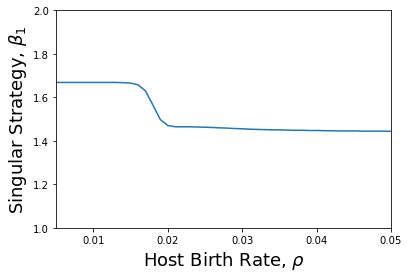

In [37]:
plt.plot(rhovals,singstratrho)
plt.xlabel(r'Host Birth Rate, $\rho$',fontsize=18)
plt.ylabel(r'Singular Strategy, $\beta_1$',fontsize=18)
plt.xlim(0.005,0.05) # in  maple first value of rho used is 0.005. limiting x-axis to this range
plt.ylim(1,2) 

# $\sigma_S$

In [38]:
rho=0.02
sigmaSvals = np.around(np.arange(start=1, stop=10.1, step=0.1),decimals=1)
betamvals = np.around(np.arange(start=0, stop=2.001, step=0.001),decimals=3)
singstratss=[]

In [39]:
for i in sigmaSvals:
    sigmaS = i 
    for j in betamvals:
        betam = j 
             
        x0 = [0.8,0.5,0.05]
        xs = odeint(resident,x0,ts)
        Ss = xs[:,0]
        I1s = xs[:,1]
        D11s = xs[:,2]

        S=Ss[99]
        I1=I1s[99]
        D11=D11s[99]
        
        dr = fitnessgrad()
        if dr < 0:
            sings = (j + (j-0.001))/2
            print("sigmaS =",sigmaS,"beta =",sings)
            singstratss.append(sings)
            break 

sigmaS = 1.0 beta = 1.4705000000000001
sigmaS = 1.1 beta = 1.4675
sigmaS = 1.2 beta = 1.4695
sigmaS = 1.3 beta = 1.4705000000000001
sigmaS = 1.4 beta = 1.4695
sigmaS = 1.5 beta = 1.4685000000000001
sigmaS = 1.6 beta = 1.4665000000000001
sigmaS = 1.7 beta = 1.4655
sigmaS = 1.8 beta = 1.4645000000000001
sigmaS = 1.9 beta = 1.4635
sigmaS = 2.0 beta = 1.4635
sigmaS = 2.1 beta = 1.4625000000000001
sigmaS = 2.2 beta = 1.4625000000000001
sigmaS = 2.3 beta = 1.4615
sigmaS = 2.4 beta = 1.4615
sigmaS = 2.5 beta = 1.4605000000000001
sigmaS = 2.6 beta = 1.4605000000000001
sigmaS = 2.7 beta = 1.4605000000000001
sigmaS = 2.8 beta = 1.4595
sigmaS = 2.9 beta = 1.4595
sigmaS = 3.0 beta = 1.4595
sigmaS = 3.1 beta = 1.4595
sigmaS = 3.2 beta = 1.4595
sigmaS = 3.3 beta = 1.4585000000000001
sigmaS = 3.4 beta = 1.4585000000000001
sigmaS = 3.5 beta = 1.4585000000000001
sigmaS = 3.6 beta = 1.4585000000000001
sigmaS = 3.7 beta = 1.4585000000000001
sigmaS = 3.8 beta = 1.4585000000000001
sigmaS = 3.9 beta = 1.458

(1.0, 2.0)

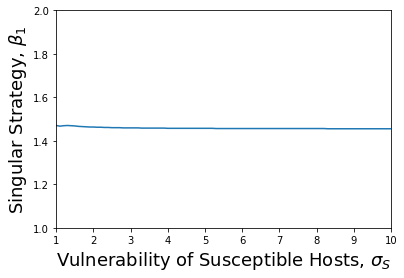

In [40]:
plt.plot(sigmaSvals,singstratss)
plt.xlabel(r'Vulnerability of Susceptible Hosts, $\sigma_S$',fontsize=18)
plt.ylabel(r'Singular Strategy, $\beta_1$',fontsize=18)
plt.xlim(1,10)
plt.ylim(1,2)

# $\sigma_I$

In [41]:
sigmaS=1
sigmaIvals = np.around(np.arange(start=1, stop=10.1, step=0.1),decimals=1)
betamvals = np.around(np.arange(start=0, stop=2.001, step=0.001),decimals=3)
singstratsi=[]

In [42]:
for i in sigmaIvals:
    sigmaI = i 
    for j in betamvals:
        betam = j 
             
        x0 = [0.8,0.5,0.05]
        xs = odeint(resident,x0,ts)
        Ss = xs[:,0]
        I1s = xs[:,1]
        D11s = xs[:,2]

        S=Ss[99]
        I1=I1s[99]
        D11=D11s[99]
        
        dr = fitnessgrad()
        if dr < 0:
            sings = (j + (j-0.001))/2
            print("sigmaI =",sigmaI,"beta =",sings)
            singstratsi.append(sings)
            break 

sigmaI = 1.0 beta = 1.5905
sigmaI = 1.1 beta = 1.5835000000000001
sigmaI = 1.2 beta = 1.5775000000000001
sigmaI = 1.3 beta = 1.5725
sigmaI = 1.4 beta = 1.5665
sigmaI = 1.5 beta = 1.5615
sigmaI = 1.6 beta = 1.5565
sigmaI = 1.7 beta = 1.5515
sigmaI = 1.8 beta = 1.5475
sigmaI = 1.9 beta = 1.5435
sigmaI = 2.0 beta = 1.5395
sigmaI = 2.1 beta = 1.5355
sigmaI = 2.2 beta = 1.5315
sigmaI = 2.3 beta = 1.5275
sigmaI = 2.4 beta = 1.5245
sigmaI = 2.5 beta = 1.5205
sigmaI = 2.6 beta = 1.5175
sigmaI = 2.7 beta = 1.5145
sigmaI = 2.8 beta = 1.5115
sigmaI = 2.9 beta = 1.5085
sigmaI = 3.0 beta = 1.5065
sigmaI = 3.1 beta = 1.5035
sigmaI = 3.2 beta = 1.5015
sigmaI = 3.3 beta = 1.4985000000000002
sigmaI = 3.4 beta = 1.4965000000000002
sigmaI = 3.5 beta = 1.4945000000000002
sigmaI = 3.6 beta = 1.4925000000000002
sigmaI = 3.7 beta = 1.4905000000000002
sigmaI = 3.8 beta = 1.4885000000000002
sigmaI = 3.9 beta = 1.4865000000000002
sigmaI = 4.0 beta = 1.4845000000000002
sigmaI = 4.1 beta = 1.4825000000000002
sigm

(1.0, 2.0)

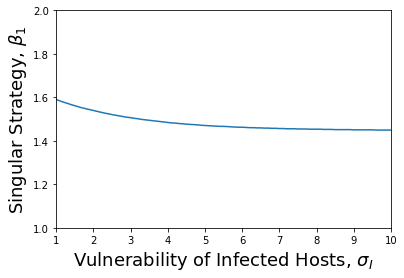

In [43]:
plt.plot(sigmaIvals,singstratsi)
plt.xlabel(r'Vulnerability of Infected Hosts, $\sigma_I$',fontsize=18)
plt.ylabel(r'Singular Strategy, $\beta_1$',fontsize=18)
plt.xlim(1,10)
plt.ylim(1,2)